# Import

In [2]:
import pandas as pd
import numpy as np
import os
import time
from datetime import datetime

# Data Load

In [3]:
data_path = '../../data/train'
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv')) # 전체 학습 데이터

# 메타 데이터들
year_data = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')
writer_data = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')
title_data = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')
director_data = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')

# Train Data

In [4]:
train_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154471 entries, 0 to 5154470
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   user    5154471 non-null  int64
 1   item    5154471 non-null  int64
 2   time    5154471 non-null  int64
dtypes: int64(3)
memory usage: 118.0 MB


In [5]:
train_df.nunique()

user      31360
item       6807
time    5074973
dtype: int64

In [6]:
print("Data sparsity ratio: ", np.round(1 - len(train_df) / (train_df['user'].nunique() * train_df['item'].nunique()), 4))

Data sparsity ratio:  0.9759


In [7]:
True in train_df[['user', 'item']].duplicated()
# 유저-아이템 상호작용에 중복값이 없다... => 유사한 방식으로 테스트 데이터를 설정했다면, 이미 시청한 영화는 추천 대상에서 제외해도 되지 않을까?

False

In [8]:
train_df['user'].value_counts().describe()

count    31360.000000
mean       164.364509
std        150.009107
min         16.000000
25%         71.000000
50%        114.000000
75%        200.000000
max       2912.000000
Name: user, dtype: float64

<AxesSubplot: >

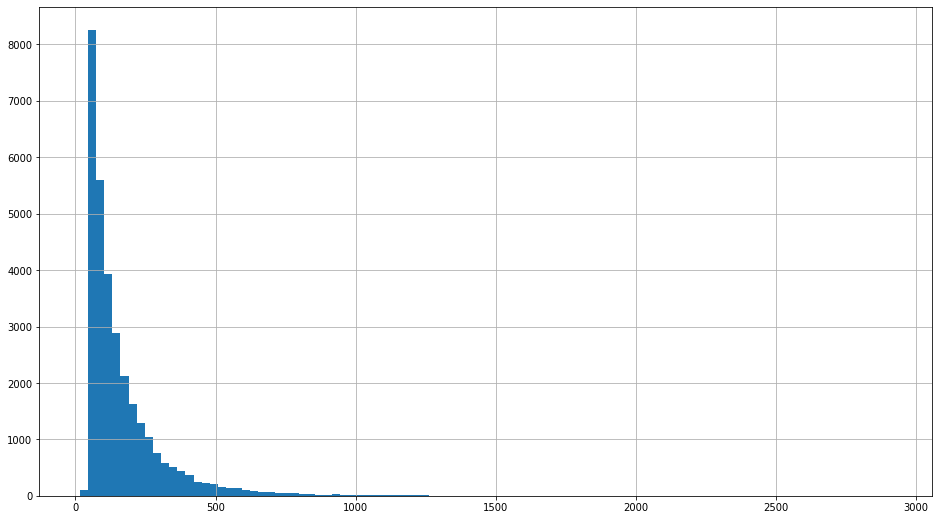

In [9]:
train_df['user'].value_counts().hist(bins=100, figsize=(16,9))

In [10]:
train_df['item'].value_counts().describe()

count     6807.000000
mean       757.230939
std       1682.973090
min         27.000000
25%         90.000000
50%        197.000000
75%        610.500000
max      19699.000000
Name: item, dtype: float64

<AxesSubplot: >

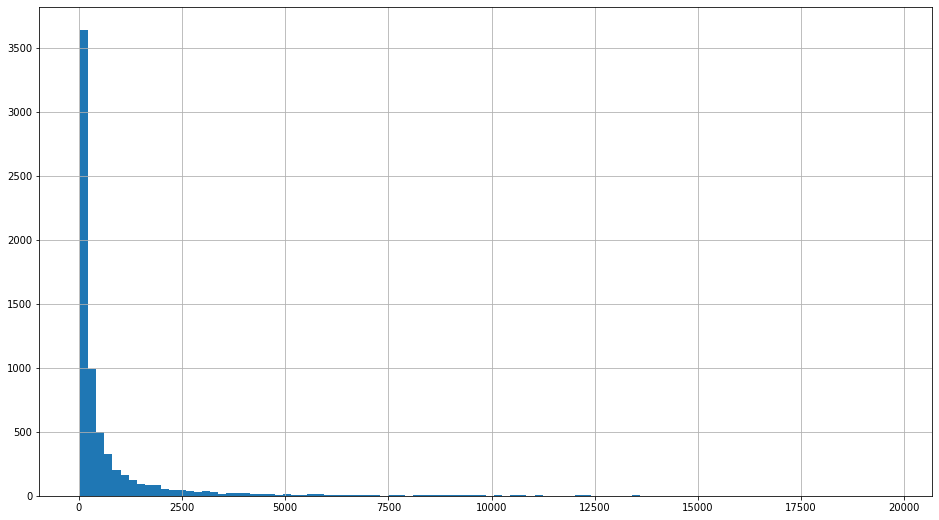

In [11]:
train_df['item'].value_counts().hist(bins=100, figsize=(16,9))

In [12]:
train_df['date'] = train_df['time'].apply(lambda x: datetime.fromtimestamp(x))

In [13]:
#train_df['date'].apply(lambda x: x.year)    # year, month, day, hour, minute, second
train_df['ym'] = train_df['date'].apply(lambda x: int(x.strftime('%Y%m')))

<AxesSubplot: >

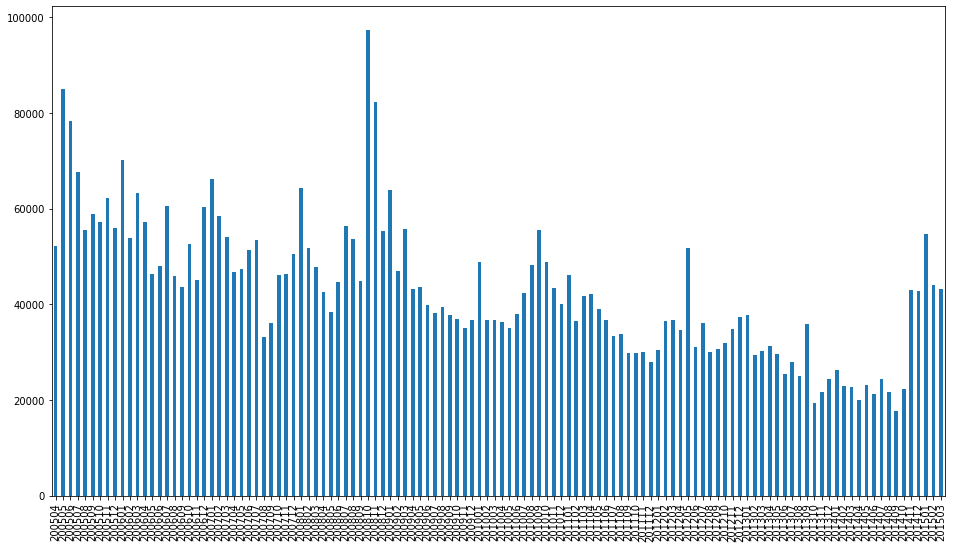

In [14]:
train_df['ym'].value_counts().sort_index().plot.bar(figsize=(16,9))

# Meta Data

In [15]:
# 메타 데이터의 기록 수, 아이템 수 비교
print("train_df['item'].nunique(): ", train_df['item'].nunique())
print("year_data: ", year_data.shape[0], ',', year_data['item'].nunique())
print("writer_data: ", writer_data.shape[0], ',', writer_data['item'].nunique())
print("title_data: ", title_data.shape[0], ',', title_data['item'].nunique())
print("genre_data: ", genre_data.shape[0], ',', genre_data['item'].nunique())
print("director_data: ", director_data.shape[0], ',', director_data['item'].nunique())

train_df['item'].nunique():  6807
year_data:  6799 , 6799
writer_data:  11306 , 5648
title_data:  6807 , 6807
genre_data:  15933 , 6807
director_data:  5905 , 5503


In [16]:
# 메타 데이터의 차원 수 비교
print("year_data: ", year_data['year'].nunique())
print("writer_data: ", writer_data['writer'].nunique())
print("title_data: ", title_data['title'].nunique())    
print("genre_data: ", genre_data['genre'].nunique())
print("director_data: ", director_data['item'].nunique())

year_data:  93
writer_data:  2989
title_data:  6806
genre_data:  18
director_data:  5503


In [17]:
year_data['year'].value_counts().describe()

count     93.000000
mean      73.107527
std       78.501656
min        2.000000
25%       19.000000
50%       37.000000
75%      100.000000
max      284.000000
Name: year, dtype: float64

In [18]:
writer_data['writer'].value_counts().describe()

count    2989.000000
mean        3.782536
std         2.993783
min         2.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        47.000000
Name: writer, dtype: float64

In [19]:
title_data['title'].value_counts().describe()

count    6806.000000
mean        1.000147
std         0.012121
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: title, dtype: float64

In [20]:
genre_data['genre'].value_counts().describe()

count      18.000000
mean      885.166667
std       866.208252
min        97.000000
25%       348.250000
50%       579.500000
75%      1165.500000
max      3490.000000
Name: genre, dtype: float64

In [21]:
director_data['director'].value_counts().describe()

count    1340.000000
mean        4.406716
std         3.633030
min         2.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        44.000000
Name: director, dtype: float64

In [22]:
# writer와 director에 겹치는 값 존재
set(writer_data['writer']) & set(director_data['director'])

{'nm0000005',
 'nm0000019',
 'nm0000033',
 'nm0000036',
 'nm0000040',
 'nm0000041',
 'nm0000045',
 'nm0000059',
 'nm0000076',
 'nm0000080',
 'nm0000095',
 'nm0000108',
 'nm0000110',
 'nm0000114',
 'nm0000116',
 'nm0000118',
 'nm0000122',
 'nm0000123',
 'nm0000127',
 'nm0000154',
 'nm0000158',
 'nm0000165',
 'nm0000180',
 'nm0000184',
 'nm0000186',
 'nm0000209',
 'nm0000217',
 'nm0000229',
 'nm0000230',
 'nm0000231',
 'nm0000233',
 'nm0000247',
 'nm0000255',
 'nm0000264',
 'nm0000265',
 'nm0000269',
 'nm0000316',
 'nm0000318',
 'nm0000320',
 'nm0000329',
 'nm0000338',
 'nm0000339',
 'nm0000341',
 'nm0000343',
 'nm0000345',
 'nm0000361',
 'nm0000382',
 'nm0000386',
 'nm0000389',
 'nm0000416',
 'nm0000419',
 'nm0000425',
 'nm0000428',
 'nm0000436',
 'nm0000455',
 'nm0000464',
 'nm0000466',
 'nm0000484',
 'nm0000485',
 'nm0000487',
 'nm0000490',
 'nm0000500',
 'nm0000517',
 'nm0000519',
 'nm0000520',
 'nm0000540',
 'nm0000559',
 'nm0000570',
 'nm0000576',
 'nm0000581',
 'nm0000583',
 'nm00

# Merge

In [23]:
year_df = pd.merge(train_df, year_data, on=['item'], how='left')
writer_df = pd.merge(train_df, writer_data, on=['item'], how='left')
title_df = pd.merge(train_df, title_data, on=['item'], how='left')
genre_df = pd.merge(train_df, genre_data, on=['item'], how='left')
director_df = pd.merge(train_df, director_data, on=['item'], how='left')

In [24]:
year_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5154471 entries, 0 to 5154470
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   user    5154471 non-null  int64         
 1   item    5154471 non-null  int64         
 2   time    5154471 non-null  int64         
 3   date    5154471 non-null  datetime64[ns]
 4   ym      5154471 non-null  int64         
 5   year    5152639 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 275.3 MB


In [25]:
year_df['year'].value_counts().describe()

count        93.00000
mean      55404.72043
std       70794.90892
min         352.00000
25%        6576.00000
50%       20068.00000
75%       77586.00000
max      272242.00000
Name: year, dtype: float64

In [26]:
writer_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11591607 entries, 0 to 11591606
Data columns (total 6 columns):
 #   Column  Non-Null Count     Dtype         
---  ------  --------------     -----         
 0   user    11591607 non-null  int64         
 1   item    11591607 non-null  int64         
 2   time    11591607 non-null  int64         
 3   date    11591607 non-null  datetime64[ns]
 4   ym      11591607 non-null  int64         
 5   writer  11278915 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 619.1+ MB


In [27]:
writer_df['writer'].value_counts().describe()

count     2989.000000
mean      3773.474406
std       7024.546360
min         85.000000
25%        466.000000
50%       1336.000000
75%       3875.000000
max      96994.000000
Name: writer, dtype: float64

In [28]:
title_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5154471 entries, 0 to 5154470
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   user    5154471 non-null  int64         
 1   item    5154471 non-null  int64         
 2   time    5154471 non-null  int64         
 3   date    5154471 non-null  datetime64[ns]
 4   ym      5154471 non-null  int64         
 5   title   5154471 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 275.3+ MB


In [29]:
title_df['title'].value_counts().describe()

count     6806.000000
mean       757.342198
std       1683.118672
min         27.000000
25%         90.000000
50%        197.000000
75%        610.750000
max      19699.000000
Name: title, dtype: float64

In [30]:
genre_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14126324 entries, 0 to 14126323
Data columns (total 6 columns):
 #   Column  Non-Null Count     Dtype         
---  ------  --------------     -----         
 0   user    14126324 non-null  int64         
 1   item    14126324 non-null  int64         
 2   time    14126324 non-null  int64         
 3   date    14126324 non-null  datetime64[ns]
 4   ym      14126324 non-null  int64         
 5   genre   14126324 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 754.4+ MB


In [31]:
genre_df['genre'].value_counts().describe()

count    1.800000e+01
mean     7.847958e+05
std      6.733935e+05
min      7.040200e+04
25%      3.163100e+05
50%      5.554060e+05
75%      1.156082e+06
max      2.511407e+06
Name: genre, dtype: float64

In [32]:
director_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5708953 entries, 0 to 5708952
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   user      5708953 non-null  int64         
 1   item      5708953 non-null  int64         
 2   time      5708953 non-null  int64         
 3   date      5708953 non-null  datetime64[ns]
 4   ym        5708953 non-null  int64         
 5   director  5407508 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 304.9+ MB


In [33]:
director_df['director'].value_counts().describe()

count      1340.000000
mean       4035.453731
std        8475.892910
min          96.000000
25%         434.000000
50%        1164.500000
75%        3800.500000
max      130434.000000
Name: director, dtype: float64

# Sequence 분할

In [34]:
train_df.groupby("user")["item"].count().describe() # 분할해서 정리할 필요가 있다

count    31360.000000
mean       164.364509
std        150.009107
min         16.000000
25%         71.000000
50%        114.000000
75%        200.000000
max       2912.000000
Name: item, dtype: float64

In [35]:
genre_df.groupby(['user', 'genre'])['item'].count().describe()  # 유저-장르 기준으로 시퀀스 분할

count    521215.000000
mean         27.102681
std          39.207138
min           1.000000
25%           5.000000
50%          15.000000
75%          33.000000
max        1813.000000
Name: item, dtype: float64

<AxesSubplot: >

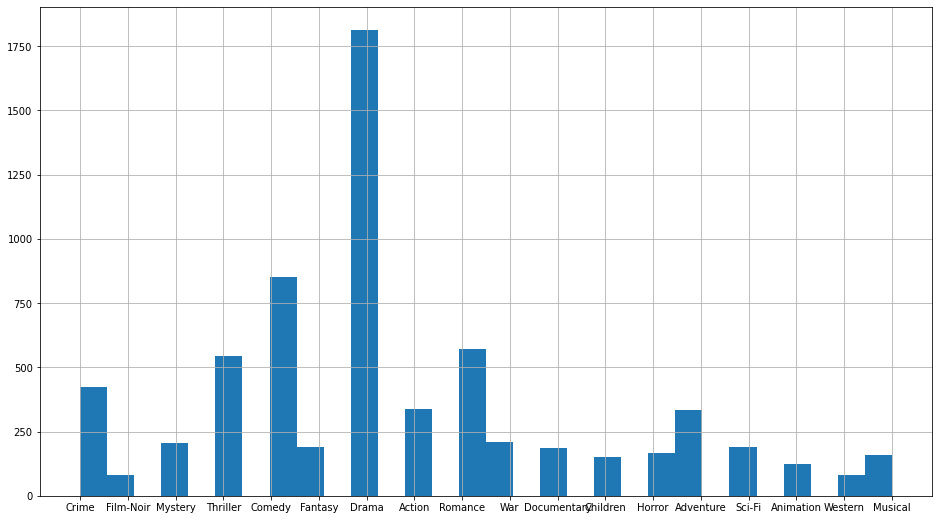

In [84]:
genre_df[genre_df['user'] == 8405]['genre'].hist(figsize=(16,9), bins=30)

In [75]:
train_df['user'].value_counts()

8405      2912
54465     1980
24219     1842
32514     1830
91349     1795
          ... 
11211       32
128756      28
105578      22
68606       19
53188       16
Name: user, Length: 31360, dtype: int64

<AxesSubplot: >

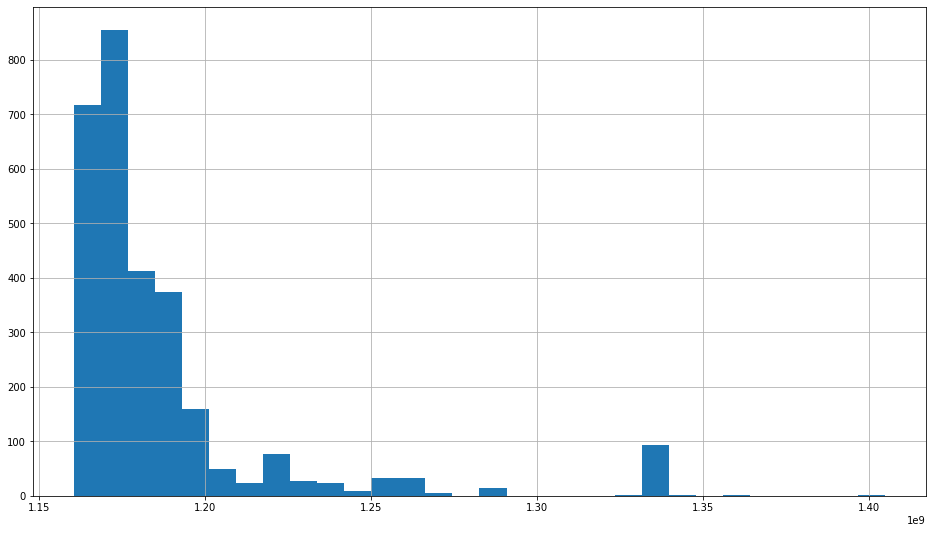

In [87]:
train_df[train_df['user'] == 8405]['time'].hist(figsize=(16,9), bins=30)

In [37]:
train_df['time'].describe()

count    5.154471e+06
mean     1.248017e+09
std      8.968302e+07
min      1.113221e+09
25%      1.170355e+09
50%      1.234651e+09
75%      1.318284e+09
max      1.427781e+09
Name: time, dtype: float64

In [66]:
# 다른 기준으로 추가적으로 분할하면 future time leakage가 발생할 수 있으므로 time point를 정해서 분할
diff, m = max(train_df['time']) - min(train_df['time']), min(train_df['time'])
k = 5
train_df['split_value'] = (train_df['time'] - m) // (diff / k)

In [67]:
train_df.groupby(["user", "split_value"])["item"].count().describe()

count    47245.000000
mean       109.100878
std        113.700003
min          1.000000
25%         46.000000
50%         76.000000
75%        138.000000
max       1968.000000
Name: item, dtype: float64